# The fastai Image classes

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.vision import * 

The fastai library is built such that the pictures loaded are wrapped in an `Image`. This `Image` contains the array of pixels associated to the picture, but also has a lot of built-in functions that will help the fastai library to process transformations applied to the corresponding image. There are also sub-classes for special types of image-like objects:

- `ImageMask` for segmentation masks
- `ImageBBox` for bounding boxes

See the following sections for documentation of all the details of these classes. But first, let's have a quick look at the main functionality you'll need to know about.

Opening an image and converting to an `Image` object is easily done by using the `open_image` function:

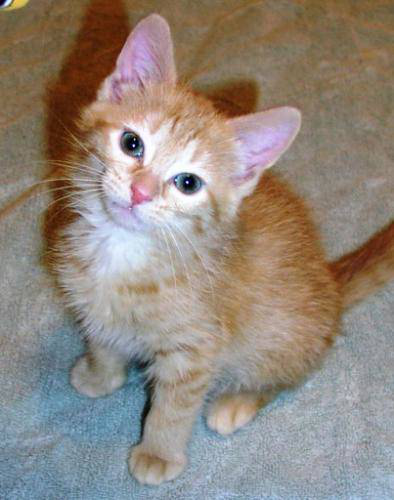

In [ ]:
img = open_image('imgs/cat_example.jpg')
img

To look at the picture that this `Image` contains, you can also use its `show` method. It will show a resized version and has more options to customize the display.

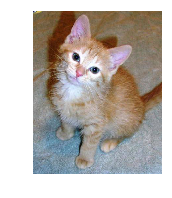

In [ ]:
img.show()

This `show` method can take a few arguments (see the documentation of `show_image` for details) but the two we will use the most in this documentation are:
- `ax` which is the [matplolib.pyplot axes](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html) on which we want to show the image
- `title` which is an optional title we can give to the image.

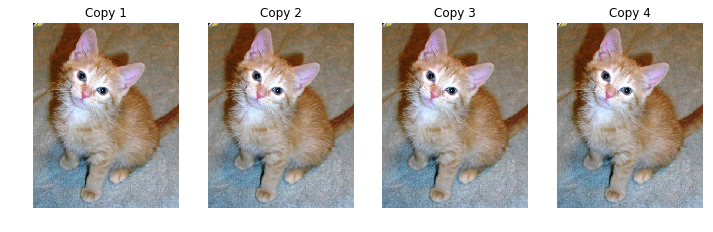

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,4))
for i,ax in enumerate(axs): img.show(ax=ax, title=f'Copy {i+1}')

If you're interested in the tensor of pixels, it's stored in the [<code>fastai.vision.data</code>](http://docs.fast.ai/vision.data.html#fastai.vision.data) attribute of an `Image`.

In [ ]:
img.data.shape

torch.Size([3, 500, 394])

## The Image classes

`Image` is the class that wraps every picture in the fastai library. It is subclassed to create `ImageMask` and `ImageBBox` when dealing with segmentation and object detection tasks. 

In [ ]:
show_doc(Image, arg_comments={
    'px': 'pixel tensor of the underlying image'
})

## <a id=Image></a>`class` `Image`
> `Image`(`px`:`Tensor`) :: [`ImageBase`](/vision.image.html#ImageBase)


Support applying transforms to image data.

- *px*: pixel tensor of the underlying image <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L79">[source]</a>

Most of the functions of the `Image` class deal with the internal pipeline of transforms, so they are only shown at the end of this page. The easiest way to create one is through the function `open_image`.

In [ ]:
show_doc(open_image)

#### <a id=open_image></a>`open_image`
> `open_image`(`fn`:`PathOrStr`) -> [`Image`](/vision.image.html#Image)


Return [`Image`](/vision.image.html#Image) object created from image in file `fn`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L226">[source]</a>

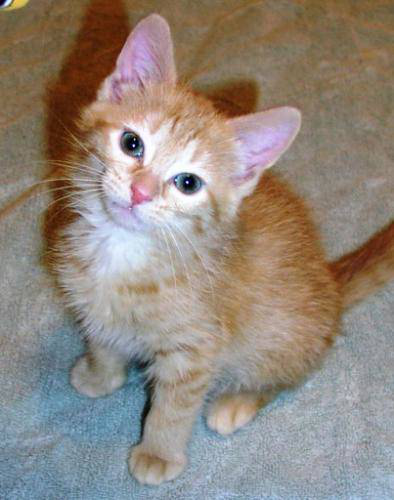

In [ ]:
img = open_image('imgs/cat_example.jpg')
img

In a Jupyter Notebook, the representation of an `Image` is its underlying picture (shown to its full size). On top of containing the tensor of pixels of the Image (and automatically doing the conversion after decoding the image), this class contains various methods for the implementation of transforms. The `Image.show` method also allows to pass more arguments, under the hood, it just calls:

In [ ]:
show_doc(show_image, arg_comments ={
    'x': '`Image` to show',
    'y': 'Potential target to be superposed on the same graph (mask, bounding box, points)',
    'ax': 'matplotlib.pyplot axes on which show the image',
    'figsize': 'Size of the figure',
    'alpha': 'Transparency to apply to y (if applicable)',
    'title': 'Title to display on top of the graph',
    'hide_axis': 'If True, the axis of the graph are hidden',
    'cmap': 'Color map to use'
})

#### <a id=show_image></a>`show_image`
> `show_image`(`x`:[`Image`](/vision.image.html#Image), `y`:[`Image`](/vision.image.html#Image)=`None`, `ax`:`Axes`=`None`, `figsize`:`tuple`=`(3, 3)`, `alpha`:`float`=`0.5`, `title`:`Optional`\[`str`\]=`None`, `hide_axis`:`bool`=`True`, `cmap`:`str`=`'viridis'`)


Plot tensor `x` using matplotlib axis `ax`.  `figsize`,`axis`,`title`,`cmap` and `alpha` pass to `ax.imshow`.

- *x*: `Image` to show
- *y*: Potential target to be superposed on the same graph (mask, bounding box, points)
- *ax*: matplotlib.pyplot axes on which show the image
- *figsize*: Size of the figure
- *alpha*: Transparency to apply to y (if applicable)
- *title*: Title to display on top of the graph
- *hide_axis*: If True, the axis of the graph are hidden
- *cmap*: Color map to use <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L242">[source]</a>

This allows us to completely customize the display of an `Image`. We'll see examples of the `y` functionality below with segmentation and bounding boxes tasks, for now here is an example using the other features. Note that the beahvior of `show_image` and `Image.show` are the same. 

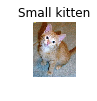

In [ ]:
show_image(img, figsize=(2,1), title='Small kitten')

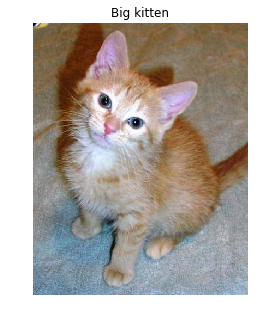

In [ ]:
img.show(figsize=(10,5), title='Big kitten')

An `Image` object also has a few attributes that can be useful:
- `Image.data` gives you the underlying tensor of pixel
- `Image.shape` gives you the size of that tensor (channels x height x width)
- `Image.size` gives you the size of the image (height x width)

In [ ]:
img.data, img.shape, img.size

(tensor([[[0.1294, 0.0863, 0.0392,  ..., 0.4706, 0.4941, 0.4863],
          [0.0745, 0.0471, 0.0392,  ..., 0.4706, 0.4863, 0.4863],
          [0.0706, 0.0510, 0.0627,  ..., 0.4784, 0.4784, 0.4784],
          ...,
          [0.3059, 0.3647, 0.3686,  ..., 0.5412, 0.5725, 0.5725],
          [0.3294, 0.4000, 0.4039,  ..., 0.5882, 0.5765, 0.5765],
          [0.3843, 0.4627, 0.4667,  ..., 0.6471, 0.5725, 0.5725]],
 
         [[0.0235, 0.0000, 0.0000,  ..., 0.3490, 0.3686, 0.3725],
          [0.0000, 0.0000, 0.0000,  ..., 0.3569, 0.3725, 0.3725],
          [0.0000, 0.0000, 0.0157,  ..., 0.3647, 0.3686, 0.3686],
          ...,
          [0.3882, 0.4588, 0.4627,  ..., 0.6471, 0.6784, 0.6784],
          [0.4118, 0.4941, 0.4980,  ..., 0.6941, 0.6824, 0.6824],
          [0.4667, 0.5569, 0.5608,  ..., 0.7529, 0.6784, 0.6784]],
 
         [[0.0980, 0.0863, 0.1059,  ..., 0.1765, 0.2078, 0.2078],
          [0.0706, 0.0745, 0.1137,  ..., 0.1922, 0.2078, 0.2157],
          [0.1020, 0.1176, 0.1647,  ...,

For a segmentation task, the target is usually a mask. The fastai library represents it as an `ImageMask` object.

In [ ]:
show_doc(ImageMask, arg_comments={
    'px': 'pixel tensor of the underlying mask'
})

## <a id=ImageMask></a>`class` `ImageMask`
> `ImageMask`(`px`:`Tensor`) :: [`Image`](/vision.image.html#Image)


Class for image segmentation target.

- *px*: pixel tensor of the underlying mask <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L193">[source]</a>

To easily open a mask, the function `open_mask` plays the same role as `open_image`:

In [ ]:
show_doc(open_mask)

#### <a id=open_mask></a>`open_mask`
> `open_mask`(`fn`:`PathOrStr`) -> [`ImageMask`](/vision.image.html#ImageMask)


Return [`ImageMask`](/vision.image.html#ImageMask) object create from mask in file `fn`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L231">[source]</a>

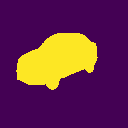

In [ ]:
open_mask('imgs/mask_example.png')

An `ImageMask` object has the same properties as an `Image`. The only difference is that when applying the transformations to an `ImageMask`, it will ignore the functions that deal with lighting and keep values of 0 and 1. As explained earlier, it's easy to show the segmentation mask over the associated `Image` by using the `y` argument of `show_image`.

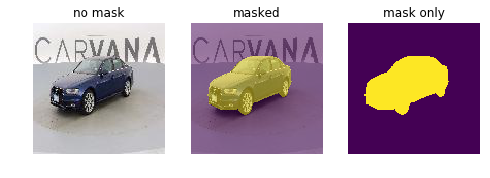

In [ ]:
img = open_image('imgs/car_example.jpg')
mask = open_mask('imgs/mask_example.png')
_,axs = plt.subplots(1,3, figsize=(8,4))
img.show(ax=axs[0], title='no mask')
img.show(ax=axs[1], y=mask, title='masked')
mask.show(ax=axs[2], title='mask only')

For an objection detection task, the target is a bounding box containg the picture.

In [ ]:
show_doc(ImageBBox, arg_comments={
    'px': 'pixel tensor of the underlying mask'
})

## <a id=ImageBBox></a>`class` `ImageBBox`
> `ImageBBox`(`px`:`Tensor`) :: [`ImageMask`](/vision.image.html#ImageMask)


Image class for bbox-style annotations.

- *px*: pixel tensor of the underlying mask <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L206">[source]</a>

Internally, the `ImageBBox` is just an `ImageMask` with a square mask representing the bounding box (or bonding boxes in several channels). This is to deal with data augmentation and might be removed in future developments. To create an `ImageBBox`, we have this helper function that will take a list of bounding boxes, each representing by a list of four numbers representing the coordinates of two corners of the box with the following convention: top, left, bottom, right. 

In [ ]:
show_doc(ImageBBox.create, arg_comments={
    'bboxes': 'list of bboxes (each of those being four integers with the top, left, bottom, right convention)',
    'h': 'height of the input image',
    'w': 'width of the input image'
})

#### <a id=create></a>`create`
> `create`(`bboxes`:`Collection`\[`Collection`\[`int`\]\], `h`:`int`, `w`:`int`) -> `ImageBBox`


Create an ImageBBox object from `bboxes`.

- *bboxes*: list of bboxes (each of those being four integers with the top, left, bottom, right convention)
- *h*: height of the input image
- *w*: width of the input image <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L209">[source]</a>

We need to pass the dimensions of the input image so that `ImageBBox` can internally create an `ImageMask` of the size of the `Image`. Again, the `Image.show` method will display the bouding box on the same image if it's passed as a `y` argument.

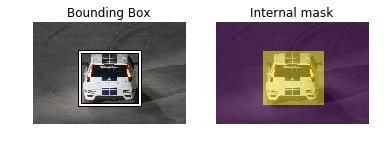

In [ ]:
img = open_image('imgs/car_bbox.jpg')
bbox = ImageBBox.create([[96, 155, 270, 351]], *img.size)
_,axs = plt.subplots(1,2)
img.show(y=bbox, ax=axs[0], title='Bounding Box')
img.show(y=ImageMask(bbox.px), ax=axs[1], title='Internal mask')

To help with the conversion of images or to show them, we use these helper functions:

In [ ]:
show_doc(pil2tensor)

#### <a id=pil2tensor></a>`pil2tensor`
> `pil2tensor`(`image`:`ndarray`) -> `Tensor`


Convert PIL style `image` array to torch style image tensor. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L33">[source]</a>

In [ ]:
show_doc(image2np)

#### <a id=image2np></a>`image2np`
> `image2np`(`image`:`Tensor`) -> `ndarray`


Convert from torch style `image` to numpy/matplotlib style. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L39">[source]</a>

In [ ]:
show_doc(bb2hw)

#### <a id=bb2hw></a>`bb2hw`
> `bb2hw`(`a`:`Collection`\[`int`\]) -> `ndarray`


Convert bounding box points from (width,height,center) to (height,width,top,left). <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L44">[source]</a>

## Applying transforms

All the transforms available for data augmentation in computer vision are defined in the [vision.transform](vision.transform.ipynb) module. When we want to apply them to an `Image`, we use this function:

In [ ]:
show_doc(apply_tfms, arg_comments={
    'tfms': '`Transform` or list of `Transform`',
    'x': '`Image` to apply the `tfms` to',
    'do_resolve': 'if False, the values of random parameters are kept from the last draw',
    'xtra': 'extra arguments to pass to the transforms',
    'size': 'desired target size',
    'mult': 'makes sure the final size is a multiple of mult',
    'do_crop': 'if True, crops the image to the final size, otherwise pads it using `padding_mode`',
    'padding_mode': "how to pad the image ('zeros', 'border', 'reflection')"
})

#### <a id=apply_tfms></a>`apply_tfms`
> `apply_tfms`(`tfms`:`Union`\[[`Transform`](/vision.image.html#Transform), `Collection`\[[`Transform`](/vision.image.html#Transform)\]\], `x`:`Tensor`, `do_resolve`:`bool`=`True`, `xtra`:`Optional`\[`Dict`\[[`Transform`](/vision.image.html#Transform), `dict`\]\]=`None`, `size`:`Union`\[`int`, `TensorImageSize`, `NoneType`\]=`None`, `mult`:`int`=`32`, `do_crop`:`bool`=`True`, `padding_mode`:`str`=`'reflection'`, `kwargs`:`Any`) -> `Tensor`


Apply all `tfms` to `x` - `do_resolve`: bind random args - `size`, `mult` used to crop/pad.

- *tfms*: `Transform` or list of `Transform`
- *x*: `Image` to apply the `tfms` to
- *do_resolve*: if False, the values of random parameters are kept from the last draw
- *xtra*: extra arguments to pass to the transforms
- *size*: desired target size
- *mult*: makes sure the final size is a multiple of mult
- *do_crop*: if True, crops the image to the final size, otherwise pads it using `padding_mode`
- *padding_mode*: how to pad the image ('zeros', 'border', 'reflection') <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L401">[source]</a>

Before showing examples, let's take a few moments to comment those arguments a bit more:
- `do_resolve` decides if we resolve the random arguments by drawing new numbers or not. The intended use is to have the `tfms` applied to the input `x` with `do_resolve`=True, then, if the target `y` needs to be applied data augmentation (if it's a segmentation mask or bounding box), apply the `tfms` to `y` with `do_resolve`=False.
- `mult` default value is very important to make sure your image can pass through most recent CNNs: they divide the size of the input image by 2 a certain amount of time so both dimensions of your picture you should be mutliples of at least 32. Only change the value of this parameter if you know it will be accepted by your model.

Here are a few helper functions to help us load the examples we saw before.

In [ ]:
def get_class_ex(): return open_image('imgs/cat_example.jpg')
def get_seg_ex(): return open_image('imgs/car_example.jpg'), open_mask('imgs/mask_example.png')
def get_bb_ex():
    img = open_image('imgs/car_bbox.jpg')
    return img, ImageBBox.create([[96, 155, 270, 351]], *img.size)

Now lets grab our usual bunch of transforms and see what they do.

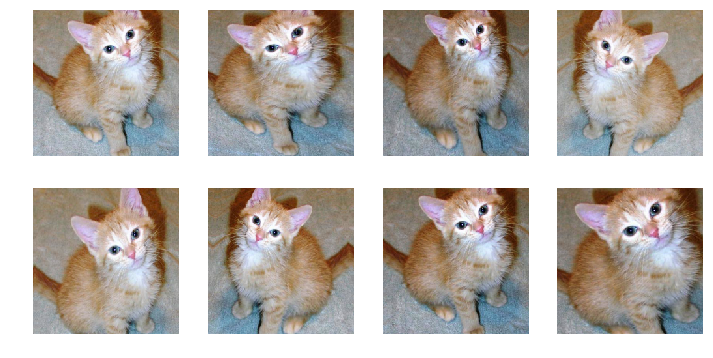

In [ ]:
tfms = get_transforms()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = apply_tfms(tfms[0], get_class_ex(), size=224)
    img.show(ax=ax)

Now let's check what it gives for a segmentation task. Note that, as instructed by the documentation of `apply_tfms` we first apply the transforms to the input, then apply them to the target while adding `do_resolve`=False.

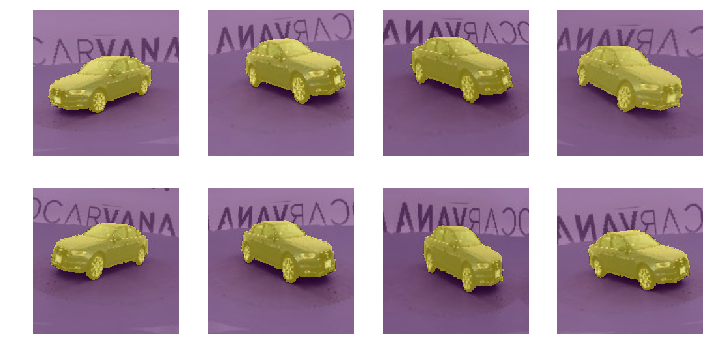

In [ ]:
tfms = get_transforms()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img,mask = get_seg_ex()
    img = apply_tfms(tfms[0], img, size=224)
    mask = apply_tfms(tfms[0], mask, do_resolve=False, size=224)
    img.show(ax=ax, y=mask)

Internally, each transforms save the values it picked randomly in a dictionary called resolved, which is how they can reuse those numbers for the target.


In [ ]:
tfms[0][4]

RandTransform(tfm=TfmAffine (zoom), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'scale': (1.0, 1.1)}, p=0.75, resolved={'row_pct': 0.3880966196533947, 'col_pct': 0.7271964467088513, 'scale': 1.050297634792686}, do_run=False, is_random=True)

Now for the bounding box, the `ImageBBox` object will automatically update the coordinates of the two opposite corners in its data attribute.

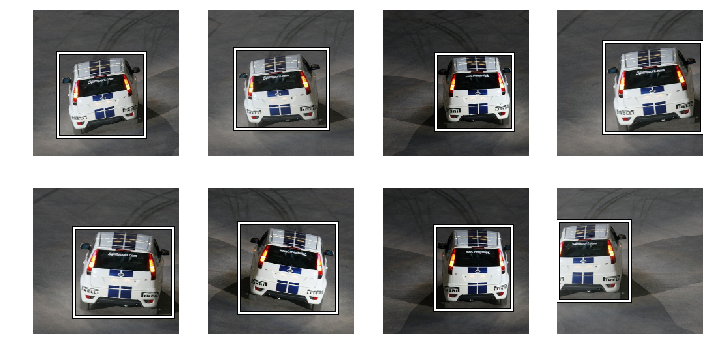

In [ ]:
tfms = get_transforms()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img,bbox = get_bb_ex()
    img = apply_tfms(tfms[0], img, size=224)
    bbox = apply_tfms(tfms[0], bbox, do_resolve=False, size=224)
    img.show(ax=ax, y=bbox)

## Randomness

As explained in the [transform module](http://docs.fast.ai/vision.transform.html#Randomness), to indicate to a `Transform` how to randomize an argument, we use a type annotation by a random function. Here is the list of the available functions.

In [ ]:
show_doc(rand_bool)

#### <a id=rand_bool></a>`rand_bool`
> `rand_bool`(`p`:`float`, `size`:`Optional`\[`List`\[`int`\]\]=`None`) -> `BoolOrTensor`


Draw 1 or shape=`size` random booleans (True occuring probability `p`). <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L25">[source]</a>

In [ ]:
rand_bool(0.5, 8)

tensor([1, 1, 1, 1, 0, 1, 1, 1], dtype=torch.uint8)

In [ ]:
show_doc(uniform)

#### <a id=uniform></a>`uniform`
> `uniform`(`low`:`Number`, `high`:`Number`=`None`, `size`:`Optional`\[`List`\[`int`\]\]=`None`) -> `FloatOrTensor`


Draw 1 or shape=`size` random floats from uniform dist: min=`low`, max=`high`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L15">[source]</a>

In [ ]:
uniform(0,1,(8,))

tensor([0.3415, 0.6459, 0.8519, 0.7157, 0.0412, 0.4517, 0.2181, 0.6656])

In [ ]:
show_doc(uniform_int)

#### <a id=uniform_int></a>`uniform_int`
> `uniform_int`(`low`:`int`, `high`:`int`, `size`:`Optional`\[`List`\[`int`\]\]=`None`) -> `IntOrTensor`


Generate int or tensor `size` of ints between `low` and `high` (included). <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L29">[source]</a>

In [ ]:
uniform_int(0,2,(8,))

tensor([0, 0, 1, 1, 1, 2, 1, 2])

In [ ]:
show_doc(log_uniform, doc_string=False)

#### <a id=log_uniform></a>`log_uniform`
> `log_uniform`(`low`, `high`, `size`:`Optional`\[`List`\[`int`\]\]=`None`) -> `FloatOrTensor`
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L20">[source]</a>

Picks a random number (or tensor `size`) between log(`low`) and log(`high`), then returns its exponential (so that it's between `low` and `high` in the end). 

In [ ]:
log_uniform(0.5,2,(8,))

tensor([0.5447, 0.8798, 1.3271, 0.9458, 1.2901, 0.7366, 0.9897, 1.4100])

## Fastai internal pipeline

### What does a transform do?

Typically, a data augmentation operation will randomly modify an image input. This operation can apply to pixels (when we modify the contrast or brightness for instance) or to coordinates (when we do a rotation, a zoom or a resize). The operations that apply to pixels can easily be coded in numpy/pytorch, directly on an array/tensor but the ones that modify the coordinates are a bit more tricky.

They usually come in three steps: first we create a grid of coordinates for our picture: this is an array of size `h * w * 2` (`h` for height, `w` for width in the rest of this post) that contains in position i,j two floats representing the position of the pixel (i,j) in the picture. They could simply be the integers i and j, but since most transformations are centered with the center of the picture as origin, they’re usually rescaled to go from -1 to 1, (-1,-1) being the top left corner of the picture, (1,1) the bottom right corner (and (0,0) the center), and this can be seen as a regular grid of size h * w. Here is a grid what our grid would look like for a 5px by 5px image.

<img src="imgs/grid.png" alt="Example of grid" width="200">

Then, we apply the transformation to modify this grid of coordinates. For instance, if we want to apply an affine transformation (like a rotation) we will transform each of those vectors `x` of size 2 by `A @ x + b` at every position in the grid. This will give us the new coordinates, as seen here in the case of our previous grid.

<img src="imgs/grid_rot.png" alt="Example of grid rotated" width="300">

There are two problems that arise after the transformation: the first one is that the pixel values won’t fall exactly on the grid, and the other is that we can get values that get out of the grid (one of the coordinates is greater than 1 or lower than -1).

To solve the first problem, we use an interpolation. If we forget the rescale for a minute and go back to coordinates being integers, the result of our transformation gives us float coordinates, and we need to decide, for each (i,j), which pixel value in the original picture we need to take. The most basic interpolation called nearest neighbor would just round the floats and take the nearest integers. If we think in terms of the grid of coordinates (going from -1 to 1), the result of our transformation gives a point that isn’t in the grid, and we replace it by its nearest neighbor in the grid.

To be smarter, we can perform a [bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation). This takes an average of the values of the pixels corresponding to the four points in the grid surrounding the result of our transformation, with weights depending on how close we are to each of those points. This comes at a computational cost though, so this is where we have to be careful.

As for the values that go out of the picture, we treat them by padding it either:
- by adding zeros on the side, so the pixels that fall out will be black (zero padding)
- by replacing them by the value at the border (border padding)
- by mirroring the content of the picture on the other side (reflection padding).

### Be smart and efficient

Usually, data augmentation libraries have separated the different operations. So for a resize, we’ll go through the three steps above, then if we do a random rotation, we’ll go again to do those steps, then for a zoom etc... The fastai library works differently in thsense that it will do all the transformations on the coordinates at the same time, so that we only do those three steps once, especially the last one (the interpolation) that is the most heavy in computation.

The first thing is that we can regroup all affine transforms in just one (since an affine transform composed by an affine transform is another affine transform). This is already done in some other libraries but we pushed the thing one step further though to integrate the resize, the crop and any non-affine transformation of the coordinates in the process. Let’s dig in!

- In step 1, when we create the grid, we use the new size we want for our image, so `new_h, new_w` (and not `h, w`). This takes care of the resize operation.
- In step 2, we do only one affine transformation, by multiplying all the affine matrices of the transforms we want to do beforehand (those are 3 by 3 matrices, so it’s super fast), then we apply to the coords any non-affine transformation we might want (jitter, perspective wrappin, etc) before...
- Step 2.5: we crop (either center or randomly) the coordinates we want to keep. Crop is easy to do whenever we want, but by doing it just before the interpolation, we don’t compute pixel values that won’t be used at the end, gaining again a bit of efficiency
- Finally step 3: the final interpolation. Afterward, we can apply on the picture all the tranforms that operate pixel-wise (as said before brightness, contrast for instance) and we’re done with data augmentation.

Note that the transforms operating on pixels are applied in two phases:
- first the transforms that deal with lighting properties are applied to the logits of the pixels. To only do once the conversion pixels -> logits -> pixels, we group the together,
- then we apply the transforms that modify the pixel.

This is why all transforms have an attribute (like `TfmAffine`, `TfmCoord`, `TfmCrop` or `TfmPixel`) so that the fastai library can regroup them and apply them all together at the right step. In terms of implementation:

- [<code>_affine_grid</code>](http://docs.fast.ai/vision.image.html#_affine_grid) is reponsible for creating the grid of coordinates
- [<code>_affine_mult</code>](http://docs.fast.ai/vision.image.html#_affine_mult) is in charge of doing the affine multiplication on that grid
- [<code>_grid_sample</code>](http://docs.fast.ai/vision.image.html#_grid_sample)is the function that is responsible for the interpolation step

### Final result

TODO: add a comparison of speeds.

Also, adding a new transformation almost doesn’t hurt performance (since the costly steps are done only once) when with classic data aug implementations, it usually result in a longer training time.

Even in terms of final result, doing only one interpolation gives a better result: if we stack several transforms and do an interpolation on each one, we approximate the true value of our coordinates in some way, which tends to blur a bit the image. By regrouping all the transformations together and only doing this step at the end, we can get something nicer.

Look at how the same rotation then zoom done separately (so with two interpolations)

<img src="imgs/two_interpol.png" alt="Image interpolated twice" width="300">

is blurrier than regrouping the transforms and doing just one interpolation

<img src="imgs/one_interpol.png" alt="Image interpolated once" width="300">

## Transform classes

The basic class that defines transformation in the fastai library is `Transform`. 

In [ ]:
show_doc(Transform, title_level=3, 
         alt_doc_string="Create a `Transform` for `func` and assign it a priority `order`.")

### <a id=Transform></a>`class` `Transform`
> `Transform`(`func`:`Callable`, `order`:`Optional`\[`int`\]=`None`)


Create a [`Transform`](/vision.image.html#Transform) for `func` and assign it a priority `order`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L263">[source]</a>

In [ ]:
show_doc(RandTransform, title_level=3, doc_string=False)

### <a id=RandTransform></a>`class` `RandTransform`
> `RandTransform`(`tfm`:[`Transform`](/vision.image.html#Transform), `kwargs`:`dict`, `p`:`int`=`1.0`, `resolved`:`dict`=`<factory>`, `do_run`:`bool`=`True`, `is_random`:`bool`=`True`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L297">[source]</a>

Create a `Transform` from func that can be randomized. Each argument of `func` in kwargs is analyzed and if it has a type annotaiton that is a random function, this function will be called to pick a value for it. This value will be stored in the `resolved` dictionary. Following the same idea, `p` is the probability for func to be called and `do_run` will be set to True if it was the cause, False otherwise. Lastly, setting `is_random` to False allows to send specific values for each parameter. 

In [ ]:
show_doc(RandTransform.resolve)

#### <a id=resolve></a>`resolve`
> `resolve`()


Binds any random variables in the transform. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L307">[source]</a>

To handle internally the data augmentation as explained earlier, each `Transform` as a type, so that the fastai library can regoup them together efficiently. There are five types of `Transform` which all work as decorators for a deterministic function.

In [ ]:
show_doc(TfmAffine, title_level=3, doc_string=False)

### <a id=TfmAffine></a>`class` `TfmAffine`
> `TfmAffine`(`func`:`Callable`, `order`:`Optional`\[`int`\]=`None`) :: [`Transform`](/vision.image.html#Transform)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L368">[source]</a>

Decorate `func` to make it an affine transform; `func` should return the 3 by 3 matrix representing the transform. The default `order` is 5 for such transforms.

In [ ]:
show_doc(TfmCoord, title_level=3, doc_string=False)

### <a id=TfmCoord></a>`class` `TfmCoord`
> `TfmCoord`(`func`:`Callable`, `order`:`Optional`\[`int`\]=`None`) :: [`Transform`](/vision.image.html#Transform)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L374">[source]</a>

Decorate `func` to make it a coord transform; `func` should take two mandatory arguments: `c` (the flow of coordinate) and `img_size` (the size of the corresponding image) and return the modified flow of coordinates. The default `order` is 4 for such transforms.

In [ ]:
show_doc(TfmLighting, title_level=3, doc_string=False)

### <a id=TfmLighting></a>`class` `TfmLighting`
> `TfmLighting`(`func`:`Callable`, `order`:`Optional`\[`int`\]=`None`) :: [`Transform`](/vision.image.html#Transform)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L380">[source]</a>

Decorate `func` to make it a lighting transform; `func` takes the logits of the pixel tensor and changes them. The default `order` is 8 for such transforms.

In [ ]:
show_doc(TfmPixel, title_level=3, doc_string=False)

### <a id=TfmPixel></a>`class` `TfmPixel`
> `TfmPixel`(`func`:`Callable`, `order`:`Optional`\[`int`\]=`None`) :: [`Transform`](/vision.image.html#Transform)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L371">[source]</a>

Decorate `func` to make it a pixel transform; `func` takes the pixel tensor and modifies it. The default `order` is 10 for such transforms.

In [ ]:
show_doc(TfmCrop, title_level=3, doc_string=False)

### <a id=TfmCrop></a>`class` `TfmCrop`
> `TfmCrop`(`func`:`Callable`, `order`:`Optional`\[`int`\]=`None`) :: [`TfmPixel`](/vision.image.html#TfmPixel)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L377">[source]</a>

Decorate `func` to make it a crop transform; This is a special case of `TfmPixel` with `order` set to 99.

To help with the conversion to logits for the `TfmLighting`, we use these helper functions:

In [ ]:
show_doc(logit)

#### <a id=logit></a>`logit`
> `logit`(`x`:`Tensor`) -> `Tensor`
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L12">[source]</a>

Take the element-wise logit of `x`. Logit is the invert function of the sigmoid, defined by log(x/(1-x)).

In [ ]:
show_doc(logit_)

#### <a id=logit_></a>`logit_`
> `logit_`(`x`:`Tensor`) -> `Tensor`
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L13">[source]</a>

In-place version of `logit`.

## Internal Image class

Image is a subclass of ImageBase, which is a shell containing the basic methods necessary for applying data augmentation. Creating an Image object is done by passing a tensor of pixels representing a picture.

In [ ]:
show_doc(Image, title_level=3, arg_comments={
    'px': 'Array of pixels'
})

### <a id=Image></a>`class` `Image`
> `Image`(`px`:`Tensor`) :: [`ImageBase`](/vision.image.html#ImageBase)


Support applying transforms to image data.

- *px*: Array of pixels <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L79">[source]</a>

In [ ]:
show_doc(Image.affine)

#### <a id=affine></a>`affine`
> `affine`(`func`:`AffineFunc`, `args`, `kwargs`) -> `Image`


Equivalent to `image.affine_mat = image.affine_mat @ func()`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L158">[source]</a>

In [ ]:
show_doc(Image.clone)

#### <a id=clone></a>`clone`
> `clone`()


Mimic the behavior of torch.clone for [`Image`](/vision.image.html#Image) objects. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L89">[source]</a>

In [ ]:
show_doc(Image.coord)

#### <a id=coord></a>`coord`
> `coord`(`func`:`CoordFunc`, `args`, `kwargs`) -> `Image`


Equivalent to `image.flow = func(image.flow, image.size)`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L153">[source]</a>

In [ ]:
show_doc(Image.lighting)

#### <a id=lighting></a>`lighting`
> `lighting`(`func`:`LightingFunc`, `args`:`Any`, `kwargs`:`Any`)


Equivalent to `image = sigmoid(func(logit(image)))`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L143">[source]</a>

In [ ]:
show_doc(Image.refresh)

#### <a id=refresh></a>`refresh`
> `refresh`()


Apply any logit, flow, or affine transfers that have been sent to the [`Image`](/vision.image.html#Image). <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L109">[source]</a>

In [ ]:
show_doc(Image.resize)

#### <a id=resize></a>`resize`
> `resize`(`size`:`Union`\[`int`, `TensorImageSize`\]) -> `Image`


Resize the image to `size`, size can be a single int. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L164">[source]</a>

In [ ]:
show_doc(Image.show, full_name='show')

#### <a id=show></a>`show`
> `show`(`ax`:`Axes`=`None`, `y`:[`Image`](/vision.image.html#Image)=`None`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L249">[source]</a>

Send the `Image` to `show_image` with `ax`, `y` and the `kwargs`. 

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(ImageBase.clone)

#### <a id=clone></a>`clone`
> `clone`() -> `ImageBase`


Clone this item and its `data`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L75">[source]</a>

In [ ]:
show_doc(Image.crop_pad)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.contrast)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(ImageBase.lighting)

#### <a id=lighting></a>`lighting`
> `lighting`(`func`:`LightingFunc`, `args`, `kwargs`) -> `ImageBase`
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L65">[source]</a>

In [ ]:
show_doc(ImageBase)

## <a id=ImageBase></a>`class` `ImageBase`
> `ImageBase`() :: [`ItemBase`](/core.html#ItemBase)


Image based [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) items derive from this. Subclass to handle lighting, pixel, etc... <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L63">[source]</a>

In [ ]:
show_doc(ImageBase.coord)

#### <a id=coord></a>`coord`
> `coord`(`func`:`CoordFunc`, `args`, `kwargs`) -> `ImageBase`
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L67">[source]</a>

In [ ]:
show_doc(Image.brightness)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.flip_lr)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.pad)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.pixel)

#### <a id=pixel></a>`pixel`
> `pixel`(`func`:`LightingFunc`, `args`, `kwargs`) -> `Image`


Equivalent to `image.px = func(image.px)`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L148">[source]</a>

In [ ]:
show_doc(Image.zoom)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.dihedral)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(ImageMask.refresh)

#### <a id=refresh></a>`refresh`
> `refresh`()


Apply any logit, flow, or affine transfers that have been sent to the [`Image`](/vision.image.html#Image). <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L197">[source]</a>

In [ ]:
show_doc(ImageBase.affine)

#### <a id=affine></a>`affine`
> `affine`(`func`:`AffineFunc`, `args`, `kwargs`) -> `ImageBase`
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L68">[source]</a>

In [ ]:
show_doc(Image.jitter)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.squish)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(ImageBase.set_sample)

#### <a id=set_sample></a>`set_sample`
> `set_sample`(`kwargs`) -> `ImageBase`


Set parameters that control how we `grid_sample` the image after transforms are applied. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L70">[source]</a>

In [ ]:
show_doc(ImageBase.pixel)

#### <a id=pixel></a>`pixel`
> `pixel`(`func`:`LightingFunc`, `args`, `kwargs`) -> `ImageBase`
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L66">[source]</a>

In [ ]:
show_doc(Image.skew)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.perspective_warp)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.zoom_squish)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.crop)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.tilt)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(Image.rotate)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>

In [ ]:
show_doc(ImageMask.lighting)

#### <a id=lighting></a>`lighting`
> `lighting`(`func`:`LightingFunc`, `args`:`Any`, `kwargs`:`Any`) -> `Image`


Equivalent to `image = sigmoid(func(logit(image)))`. <a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L195">[source]</a>

In [ ]:
show_doc(Image.symmetric_warp)

#### <a id=<lambda>></a>`<lambda>`
> `<lambda>`(`x`, `args`, `kwargs`)
<a href="https://github.com/fastai/fastai/blob/master/fastai/vision/image.py#L276">[source]</a>